In [1]:
from IPython.display import display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def splot(RGB, Mf):
    r = int(len(Mf)/2)
    nr = 0
    for i in range(len(Mf)):
        for j in range(len(Mf[0])):
            nr += Mf[i][j]
    print(nr)
    nr = max(nr, 1)
    RGB2 = np.zeros((len(RGB), len(RGB[0]),3), dtype=np.uint8,)
    for x in range(r, len(RGB)-r):
        for y in range(r, len(RGB[0])-r):
            tmp = np.zeros(3)
            for i in range(len(Mf)):
                for j in range(len(Mf[0])):
                    tmp += RGB[x-r+i][y-r+j]*Mf[i][j]
            tmp = abs(tmp)
            tmp /= nr
            for i in range(3):
                if tmp[i] > 255:
                    tmp[i] = 255
            RGB2[x][y] = tmp
    return RGB2

In [3]:
def smoothGauss(RGB, sigma, r):
    if r > 12:
        r = 12
        
    # Tworzenie filtra Gaussa
    filter_size = (2*r + 1, 2*r + 1)
    filter_center = (r, r)
    filter_kernel = np.zeros(filter_size)
    for x in range(filter_size[0]):
        for y in range(filter_size[1]):
            up = (-(filter_kernel[0, x]-filter_kernel[0, 0])**2 + (filter_kernel[1, y]-filter_kernel[1, 0])**2)/2*sigma**2
            base = 1/(2*np.pi*sigma**2)*np.exp(up)
            filter_kernel[x, y] = base
    # Normalizacja filtra
    # "Not normalizing is the equivalent of applying two filters:
    # gaussian blurring filter + brightness filter." - Takie informacje na internecie znalazłem
    filter_kernel /= np.sum(filter_kernel)
    
    # Filtrowanie obrazu
    filtered_image = splot(RGB, filter_kernel)
    
    return filtered_image

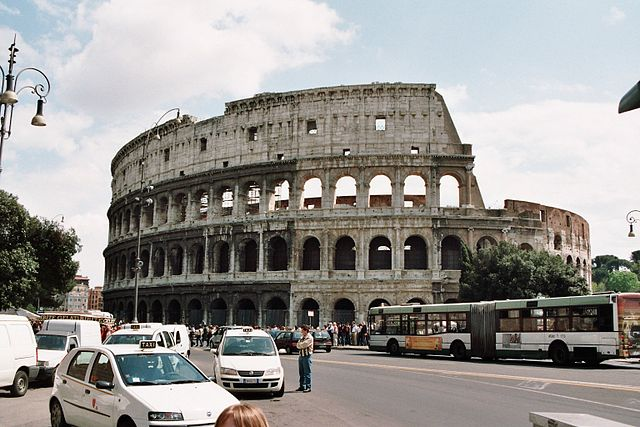

In [4]:
path="./Koloseum.png"
img = Image.open(path)
display(img)
arr = np.array(img)

1.0


display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


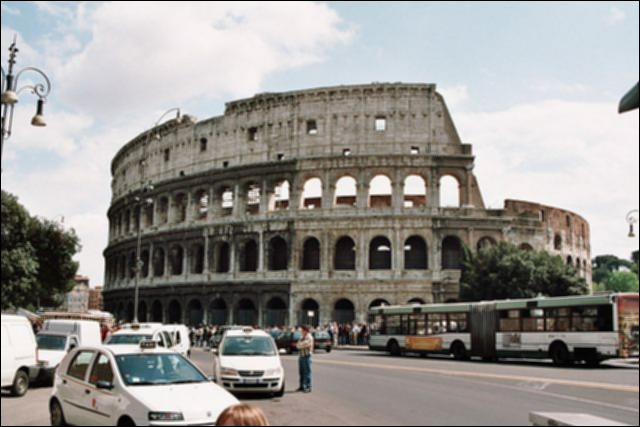

In [5]:
data = smoothGauss(arr, 0.75, 1)
img2 = Image.fromarray(data, 'RGB')
img2.show()
display(img2)

1.0


display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


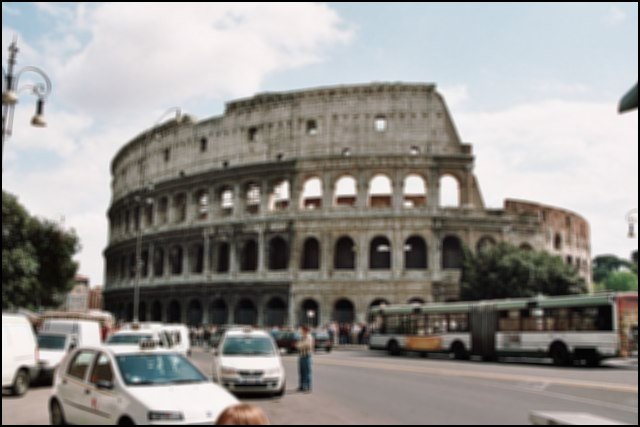

In [6]:
data = smoothGauss(arr, 0.75, 2)
img2 = Image.fromarray(data, 'RGB')
img2.show()
display(img2)

0.9999999999999998


display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


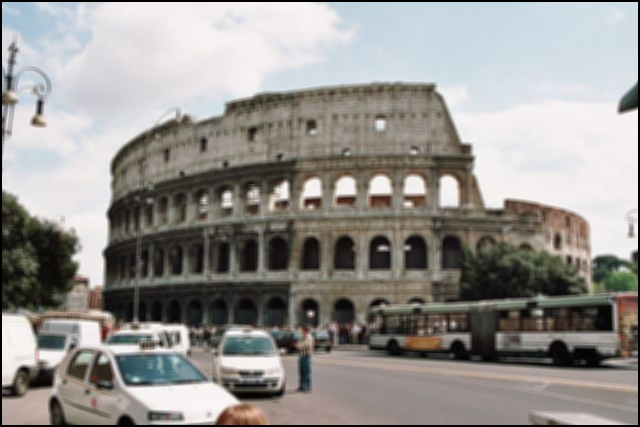

In [7]:
data = smoothGauss(arr, 0.25, 2)
img2 = Image.fromarray(data, 'RGB')
img2.show()
display(img2)

0.9999999999999997


display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


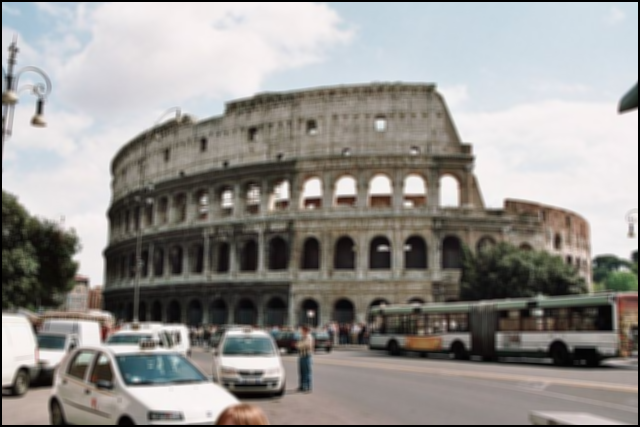

In [8]:
data = smoothGauss(arr, 0.90, 2)
img2 = Image.fromarray(data, 'RGB')
img2.show()
display(img2)

1.000000000000011


display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/432.


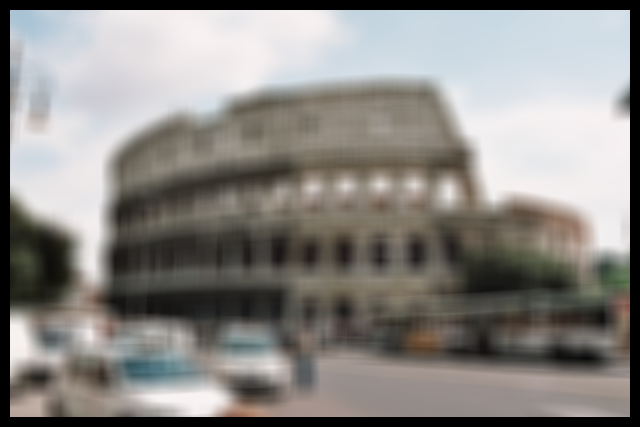

In [9]:
data = smoothGauss(arr, 0.90, 10)
img2 = Image.fromarray(data, 'RGB')
img2.show()
display(img2)